In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
portfolio=pd.read_csv('/Users/yashagarwal/Downloads/Bank-porfolio-1.csv')
portfolio.set_index(['Date'], inplace = True)
asset_prices = portfolio.loc[:,'HDFC Bank':'ICICI Bank']
weights=[0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
portfolio.head()

,HDFC Bank,Yes Bank,Axis Bank,Indusind Bank,Kotak Mahindra Bank,ICICI Bank
Date,,,,,,
2019-10-01,1995.65,32.00,679.15,1298.05,1648.20,424.6
2019-10-03,1974.55,42.50,668.40,1255.50,1615.75,427.3
2019-10-04,1978.30,42.15,656.40,1265.30,1563.15,413.9
2019-10-07,1969.30,45.65,673.45,1241.05,1555.65,416.1
2019-10-09,2002.00,43.25,686.30,1308.65,1612.35,436.7


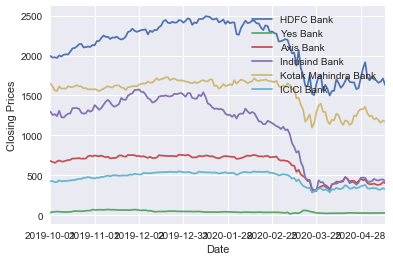

            HDFC Bank  Yes Bank  Axis Bank  Indusind Bank  \
Date                                                        
2019-10-01        NaN       NaN        NaN            NaN   
2019-10-03  -0.010573  0.328125  -0.015829      -0.032780   
2019-10-04   0.001899 -0.008235  -0.017953       0.007806   
2019-10-07  -0.004549  0.083037   0.025975      -0.019165   
2019-10-09   0.016605 -0.052574   0.019081       0.054470   
2019-10-10  -0.007018 -0.053179  -0.019452      -0.061246   
2019-10-11   0.011167 -0.032967  -0.000371      -0.004314   
2019-10-14   0.002288  0.012626   0.016055       0.022400   
2019-10-15  -0.000720  0.012469   0.009583       0.017312   
2019-10-16   0.017583  0.011084   0.004855       0.001769   
2019-10-17   0.020037  0.154689   0.024373       0.051471   
2019-10-18   0.002249  0.084388  -0.001056       0.001903   
2019-10-22   0.009764  0.007782   0.004510      -0.001229   
2019-10-23   0.013263 -0.011583   0.002946      -0.006264   
2019-10-24   0.000933 -0

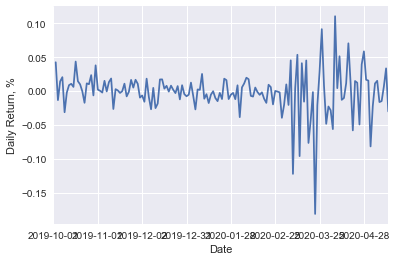

In [148]:
portfolio.plot().set_ylabel("Closing Prices")
plt.show()
asset_returns = asset_prices.pct_change(fill_method ='ffill')
print(asset_returns)
portfolio_returns = asset_returns.dot(weights)
# Plot portfolio returns
portfolio_returns.plot().set_ylabel("Daily Return, %")
plt.show()

                     HDFC Bank  Yes Bank  Axis Bank  Indusind Bank  \
HDFC Bank             0.271505 -0.077651   0.232139       0.263022   
Yes Bank             -0.077651  2.893943  -0.006055      -0.153962   
Axis Bank             0.232139 -0.006055   0.455011       0.424918   
Indusind Bank         0.263022 -0.153962   0.424918       1.014786   
Kotak Mahindra Bank   0.175485 -0.129374   0.197773       0.235317   
ICICI Bank            0.233057 -0.096073   0.321813       0.324080   

                     Kotak Mahindra Bank  ICICI Bank  
HDFC Bank                       0.175485    0.233057  
Yes Bank                       -0.129374   -0.096073  
Axis Bank                       0.197773    0.321813  
Indusind Bank                   0.235317    0.324080  
Kotak Mahindra Bank             0.229886    0.196267  
ICICI Bank                      0.196267    0.326628  


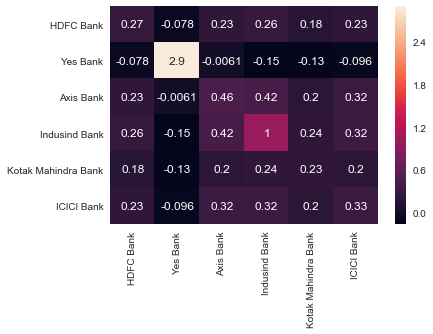

In [119]:
# Generate the covariance matrix from portfolio asset's returns
covariance = asset_returns.cov()

# Annualize the covariance using 252 trading days per year
covariance = covariance * 252

# Display the covariance matrix
print(covariance)
sns.set()
ax = sns.heatmap(covariance,annot=True)

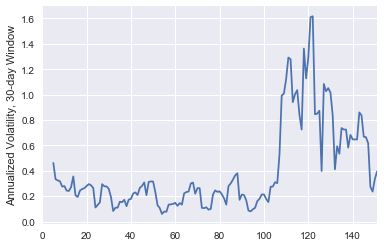

In [127]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_returns.rolling(5)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

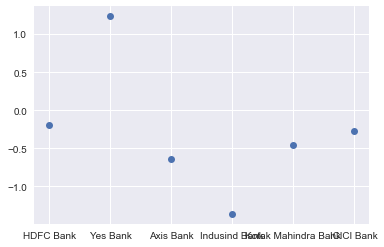

Sample Covariance Matrix
                      HDFC Bank  Yes Bank  Axis Bank  Indusind Bank  \
HDFC Bank             0.271505 -0.077651   0.232139       0.263022   
Yes Bank             -0.077651  2.893943  -0.006055      -0.153962   
Axis Bank             0.232139 -0.006055   0.455011       0.424918   
Indusind Bank         0.263022 -0.153962   0.424918       1.014786   
Kotak Mahindra Bank   0.175485 -0.129374   0.197773       0.235317   
ICICI Bank            0.233057 -0.096073   0.321813       0.324080   

                     Kotak Mahindra Bank  ICICI Bank  
HDFC Bank                       0.175485    0.233057  
Yes Bank                       -0.129374   -0.096073  
Axis Bank                       0.197773    0.321813  
Indusind Bank                   0.235317    0.324080  
Kotak Mahindra Bank             0.229886    0.196267  
ICICI Bank                      0.196267    0.326628   

Efficient Covariance Matrix
                      HDFC Bank  Yes Bank  Axis Bank  Indusind Bank 

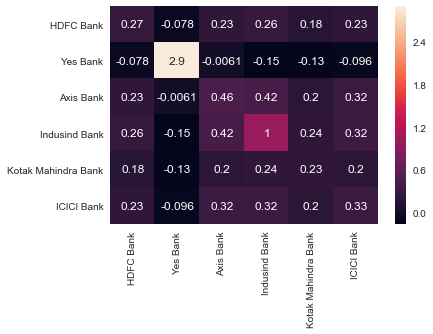

In [144]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
prices = pd.read_csv('/Users/yashagarwal/Downloads/Bank-porfolio-1.csv')
# Convert the 'Date' column to a datetime index
#prices['Date'] = pd.to_datetime(prices['Date'], format='%d/%m/%Y')
prices.set_index(['Date'], inplace = True)
mean_returns = mean_historical_return(prices, frequency = 252)
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.show()


# Create the CovarianceShrinkage instance variable
cs = CovarianceShrinkage(prices)
sample_cov = prices.pct_change().cov() * 252


# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Sample Covariance Matrix\n", sample_cov, "\n")
print("Efficient Covariance Matrix\n", e_cov, "\n")
ax = sns.heatmap(sample_cov,annot=True)


KeyError: 'Date'

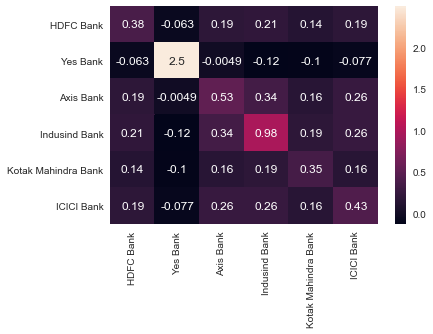

In [152]:
ay = sns.heatmap(e_cov,annot=True)
print(prices['Date'])

In [168]:
class pypfopt.cla
# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '2019-10-01', 'end': '2020-01-31'},
           'during' : {'start': '2020-02-01', 'end': '2020-03-31'},
           'after'  : {'start': '2020-04-01', 'end': '2020-05-14'}
         }

# Compute the efficient covariance for each epoch
e_cov = {}
for x in epochs.keys():
  sub_price = prices.loc[epochs[x]['start']:epochs[x]['end']]
  e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices\n", e_cov)

# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = cla.CLA(mean_returns, e_cov)

# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'g', marker = '.', label = 'During')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-168-f790ca4c83a6>, line 1)